# Correlation Study

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("no issue")

no issue


In [86]:
df_merged = pd.read_csv('Data/edited data/merged_data.csv')
df_merged = df_merged.astype(float)

### Pairwise Correlation

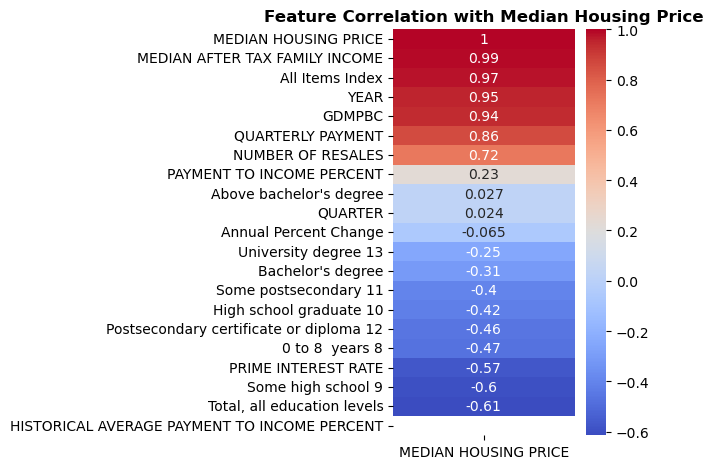

In [87]:
corr = df_merged.corr(numeric_only=True)

sns.heatmap(
    corr[['MEDIAN HOUSING PRICE']].sort_values(by='MEDIAN HOUSING PRICE', ascending=False),
    annot=True,
    cmap='coolwarm'
)

plt.title(
    "Feature Correlation with Median Housing Price",
    fontweight='bold'
)
plt.tight_layout()
plt.show()

Multicollinearity (checking for redundancy)

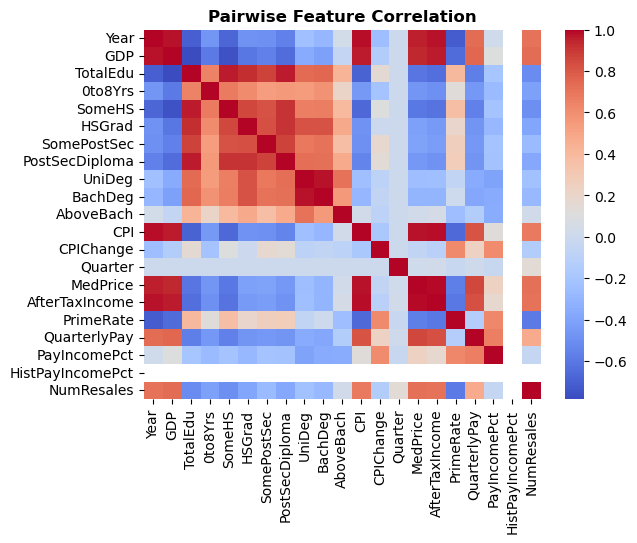

In [88]:
rename_dict = { # rename for readability
    'YEAR': 'Year',
    'GDMPBC': 'GDP',
    'Total, all education levels': 'TotalEdu',
    '0 to 8  years 8': '0to8Yrs',
    'Some high school 9': 'SomeHS',
    'High school graduate 10': 'HSGrad',
    'Some postsecondary 11': 'SomePostSec',
    'Postsecondary certificate or diploma 12': 'PostSecDiploma',
    'University degree 13': 'UniDeg',
    "Bachelor's degree": 'BachDeg',
    "Above bachelor's degree": 'AboveBach',
    'All Items Index': 'CPI',
    'Annual Percent Change': 'CPIChange',
    'QUARTER': 'Quarter',
    'HOUSING TYPE': 'HouseType',
    'MEDIAN HOUSING PRICE': 'MedPrice',
    'MEDIAN AFTER TAX FAMILY INCOME': 'AfterTaxIncome',
    'PRIME INTEREST RATE': 'PrimeRate',
    'QUARTERLY PAYMENT': 'QuarterlyPay',
    'PAYMENT TO INCOME PERCENT': 'PayIncomePct',
    'HISTORICAL AVERAGE PAYMENT TO INCOME PERCENT': 'HistPayIncomePct',
    'NUMBER OF RESALES': 'NumResales'
}

sns.heatmap(
    corr.rename(index=rename_dict, columns=rename_dict),
    cmap='coolwarm'
)

plt.title(
    "Pairwise Feature Correlation",
    fontweight='bold'
)
plt.show()

Filter out features

In [89]:
s = 0
if s:
    # leave out strong feats
    tgt_corr = corr['MEDIAN HOUSING PRICE']
    stgt_corr_idx = list(set(list(tgt_corr[abs(tgt_corr) < 0.9].index) + ['YEAR', 'MEDIAN HOUSING PRICE', 'QUARTER']))
else:
    # leave out weak feats
    tgt_corr = corr['MEDIAN HOUSING PRICE']
    stgt_corr_idx = list(set(list(tgt_corr[abs(tgt_corr) > 0.05].index) + ['YEAR', 'MEDIAN HOUSING PRICE', 'QUARTER']))

print(df_merged[stgt_corr_idx].iloc[0])


Postsecondary certificate or diploma 12         6.200000
0 to 8  years 8                                10.500000
QUARTERLY PAYMENT                            4933.598166
Annual Percent Change                           5.400000
PRIME INTEREST RATE                            13.846154
MEDIAN AFTER TAX FAMILY INCOME              37138.510090
GDMPBC                                      41964.000000
University degree 13                            4.300000
Total, all education levels                     7.400000
Some high school 9                             12.900000
MEDIAN HOUSING PRICE                       147500.000000
YEAR                                         1990.000000
QUARTER                                         1.000000
Bachelor's degree                               4.600000
All Items Index                                78.400000
Some postsecondary 11                           8.800000
NUMBER OF RESALES                            9617.000000
PAYMENT TO INCOME PERCENT      

In [ ]:
'GDMPBC', 'QUARTERLY PAYMENT', 'NUMBER OF RESALES', 'MEDIAN AFTER TAX FAMILY INCOME'
'Postsecondary certificate or diploma 12', '0 to 8  years 8', 'University degree 13', 'Some high school 9', "Bachelor's degree", 'Some postsecondary 11', 'High school graduate 10'

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df_filt = df_merged[stgt_corr_idx].copy().drop(columns=[])
df_filt_train = df_filt[df_filt['YEAR'] <= 2018]
df_filt_test = df_filt[df_filt['YEAR'] > 2018]

X_train = df_filt_train.drop(columns=["MEDIAN HOUSING PRICE"])
Y_train = df_filt_train["MEDIAN HOUSING PRICE"]
X_test = df_filt_test.drop(columns=["MEDIAN HOUSING PRICE"])
Y_test = df_filt_test["MEDIAN HOUSING PRICE"]

LR_model = LinearRegression()
LR_model.fit(X_train, Y_train)
Y_pred = LR_model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

coef_label = pd.DataFrame({
    'Feats': X_test.columns,
    'Coefs': LR_model.coef_
})
print(coef_label)

print(f'Mean Squared Error: {mse:.2f}, Sqrt MSE: {np.sqrt(mse):.2f}')
print(f'R^2 Score: {r2:.2f}')

                                      Feats         Coefs
0   Postsecondary certificate or diploma 12  -7450.670041
1                           0 to 8  years 8   -337.170090
2                         QUARTERLY PAYMENT      2.116995
3                     Annual Percent Change   7252.692986
4                       PRIME INTEREST RATE -25202.016274
5            MEDIAN AFTER TAX FAMILY INCOME      6.872639
6                                    GDMPBC     -4.346781
7                      University degree 13   -772.443855
8               Total, all education levels   9200.297883
9                        Some high school 9   2427.614139
10                                     YEAR   3460.775376
11                                  QUARTER   -368.574756
12                        Bachelor's degree -10216.096202
13                          All Items Index    176.860269
14                    Some postsecondary 11   -154.921884
15                PAYMENT TO INCOME PERCENT   8120.014478
16            

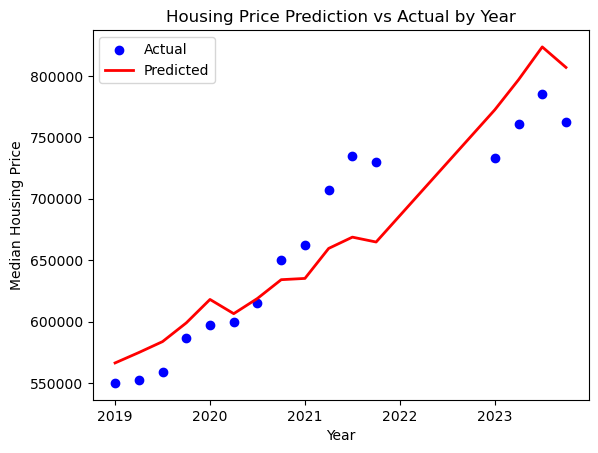

In [ ]:
# merge year and quarter into a single feature for plot
df_filt_test.loc[:, 'YEAR'] = df_filt_test['YEAR'] + (df_filt_test['QUARTER'] - 1) * 0.25
df_test = df_filt_test.drop(columns=['QUARTER'])

# plot for actual values & predicted values
plt.scatter(df_test['YEAR'], df_test['MEDIAN HOUSING PRICE'], color='blue', label='Actual')
plt.plot(df_test['YEAR'], Y_pred, color='red', linewidth=2, label='Predicted')

plt.xlabel('Year')
plt.ylabel('Median Housing Price')
plt.title('Housing Price Prediction vs Actual by Year')
plt.legend()
plt.show()